In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config

In [3]:
#Load google.cloud.bigquery
%load_ext google.cloud.bigquery

In [4]:
#Select path to credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=config.GOOGLE_APPLICATION_CREDENTIALS

In [5]:
%%bigquery --use_rest_api ZRI_MF
SELECT *
FROM `high-empire-220313.ZRI.Multi_Family`

In [6]:
ZRI_MF.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,_2010_09,_2010_10,_2010_11,...,_2019_04,_2019_05,_2019_06,_2019_07,_2019_08,_2019_09,_2019_10,_2019_11,_2019_12,_2020_01
0,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,...,1226.0,1250.0,1264.0,1251.0,1246.0,1252.0,1280.0,1310.0,1294.0,1286.0
1,61616,10002,New York,NY,New York-Newark-Jersey City,New York County,7,NaN,NaN,NaN,...,3406.0,3408.0,3420.0,3432.0,3440.0,3481.0,3437.0,3485.0,NaN,3538.0
2,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,8,NaN,NaN,NaN,...,1305.0,1301.0,1298.0,1298.0,1298.0,1307.0,1306.0,1311.0,NaN,1367.0
3,92593,78660,Pflugerville,TX,Austin-Round Rock,Travis County,13,NaN,NaN,NaN,...,1280.0,1283.0,1288.0,1301.0,1322.0,1341.0,1339.0,1375.0,1387.0,1362.0
4,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,NaN,NaN,NaN,...,3397.0,3402.0,3405.0,3411.0,3427.0,3459.0,3457.0,3445.0,3398.0,3354.0


In [8]:
year_columns = [x for x in ZRI_MF.columns if ('20' in x)]

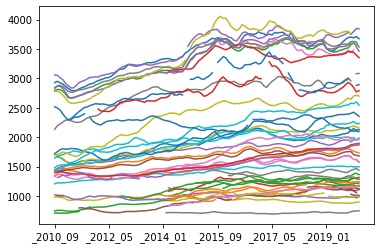

In [9]:
#Plot 50 largest zip code's ZRI over time
fig, ax = plt.subplots()
for i in range(1,50):
    ZRI_MF[ZRI_MF.SizeRank == i].loc[:,year_columns].transpose().plot(kind = 'line', ax = ax)
ax.get_legend().remove()

Next steps:
Use various time series analyses techniques to forecast purely based off of previous ZRI. 
